In [1]:
import numpy as np
import pandas as pd
import datetime
import os
import os.path

In [2]:
# Load train and test datasets
train_file = 'train.csv'
test_file = 'test.csv'
data_path = './data'

df_train = pd.read_csv(os.path.join(data_path, train_file))
df_test = pd.read_csv(os.path.join(data_path, test_file))

In [3]:
# First look into data

# Missing data
print("Missing data:\n\n", df_train.isnull().sum(axis=0))
df_train[df_train['Qualification'].isnull()]

Missing data:

 EmployeeNo                                0
Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
dtype: int64


,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
15,YAK/S/00022,Customer Support and Field Operations,NaN,Male,Direct Internal process,2,1980,10.0,2008,0,0,49,RIVERS,Yes,Married,No,No,1,0
22,YAK/S/00033,Commercial Sales and Marketing,NaN,Female,Direct Internal process,2,1997,2.5,2017,0,0,40,EDO,Yes,Married,No,No,1,0
28,YAK/S/00044,Commercial Sales and Marketing,NaN,Male,Agency and others,4,1997,5.0,2017,0,0,40,CROSS RIVER,Yes,Married,No,No,1,0
60,YAK/S/00091,Commercial Sales and Marketing,NaN,Female,Direct Internal process,2,2001,0.0,2018,0,0,47,ZAMFARA,Yes,Single,No,No,2,0
137,YAK/S/00190,Customer Support and Field Operations,NaN,Female,Agency and others,2,1988,10.0,2010,0,0,56,LAGOS,Yes,Single,No,No,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38212,YAK/S/54656,Information and Strategy,NaN,Male,Agency and others,3,1996,10.0,2016,0,0,75,LAGOS,Yes,Married,No,No,0,0
38223,YAK/S/54672,Information and Strategy,NaN,Male,Direct Internal process,2,1994,7.5,2017,0,0,76,OSUN,Yes,Married,No,No,0,0
38236,YAK/S/54693,Commercial Sales and Marketing,NaN,Female,Direct Internal process,2,1986,7.5,2012,0,0,45,EDO,Yes,Married,No,No,0,0
38262,YAK/S/54730,People/HR Management,NaN,Female,Agency and others,2,1993,7.5,2017,0,0,45,RIVERS,Yes,Married,No,No,1,0


In [4]:
df_train.dtypes

EmployeeNo                              object
Division                                object
Qualification                           object
Gender                                  object
Channel_of_Recruitment                  object
Trainings_Attended                       int64
Year_of_birth                            int64
Last_performance_score                 float64
Year_of_recruitment                      int64
Targets_met                              int64
Previous_Award                           int64
Training_score_average                   int64
State_Of_Origin                         object
Foreign_schooled                        object
Marital_Status                          object
Past_Disciplinary_Action                object
Previous_IntraDepartmental_Movement     object
No_of_previous_employers                object
Promoted_or_Not                          int64
dtype: object

In [6]:
# Analyse distribution of categorical features

cat_cols = df_train.dtypes[df_train.dtypes == 'object']

print('df_train.shape[0]:', df_train.shape[0])
for col in cat_cols.index:
    print(col, ';', df_train[col].value_counts().shape[0])

df_train.shape[0]: 38312
EmployeeNo ; 38312
Division ; 9
Qualification ; 3
Gender ; 2
Channel_of_Recruitment ; 3
State_Of_Origin ; 37
Foreign_schooled ; 2
Marital_Status ; 3
Past_Disciplinary_Action ; 2
Previous_IntraDepartmental_Movement ; 2
No_of_previous_employers ; 7


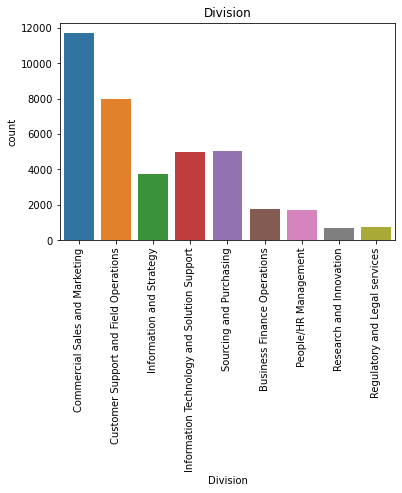

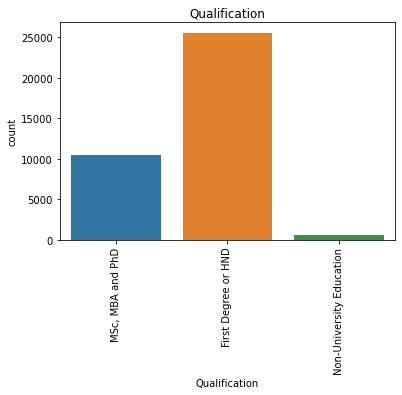

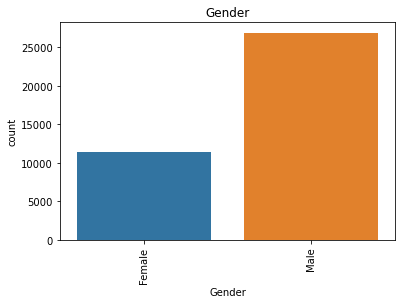

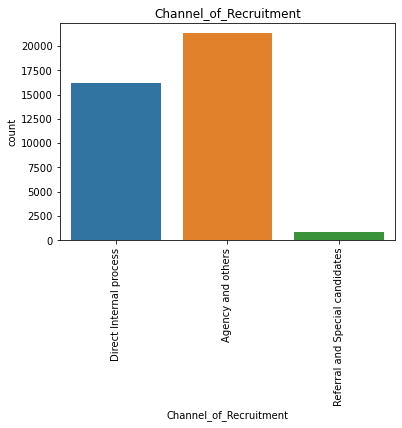

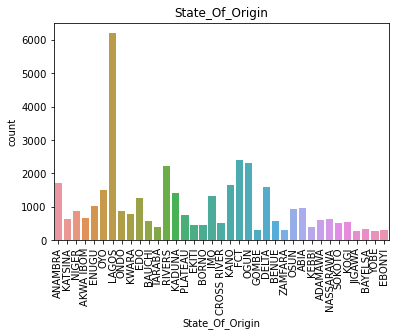

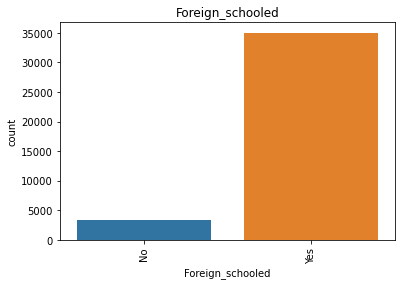

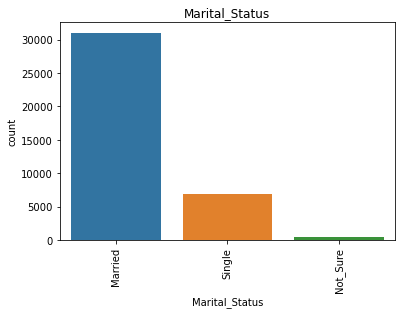

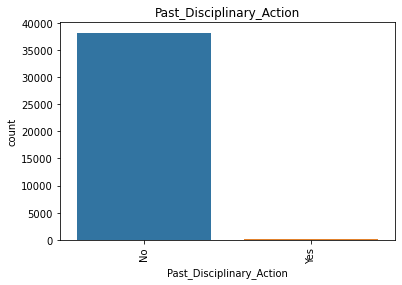

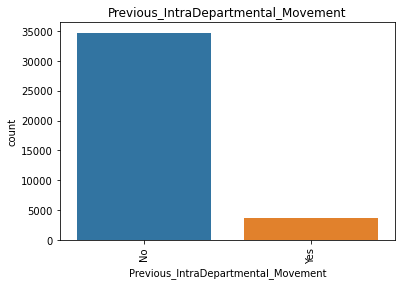

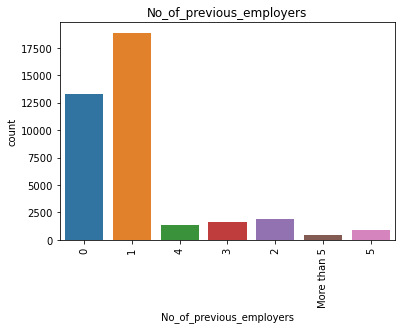

In [7]:
# Visualization of categorical features' distribution

import seaborn as sb
import matplotlib.pyplot as plt

for col in cat_cols.index:
    if col != 'EmployeeNo':
        plt.figure()
        plot = sb.countplot(x=col, data=df_train)
        plot.set_title(col)
        plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
        

In [8]:
# Pipeline feature config

# Target variable
target_col = 'Promoted_or_Not'

# Columns that require one-hot-encoding
binary_encoding_cols = [
    'Gender',
    'Channel_of_Recruitment',
    'Foreign_schooled',
    'Marital_Status',
    'Past_Disciplinary_Action',
    'Previous_IntraDepartmental_Movement'
]

# Columns and maps for label encoding
label_encoding_dict = {
    'Qualification': {'unknown': 0,
                      'Non-University Education': 1,
                      'First Degree or HND': 2,
                      'MSc, MBA and PhD': 3
                     },
    'No_of_previous_employers': {'0': 0,
                                 '1': 1,
                                 '2': 2,
                                 '3': 3,
                                 '4': 4,
                                 '5': 5,
                                 'More than 5': 6
                                }
}

# Numerical features for Feature Engineering
num_cols = [x for x in df_train.dtypes.index[(df_train.dtypes == int) | (df_train.dtypes == float)] if x != target_col]

# Features for target encoding
target_encoding_cols = [
    'Division',
    'State_Of_Origin'
]

In [9]:
num_cols

['Trainings_Attended',
 'Year_of_birth',
 'Last_performance_score',
 'Year_of_recruitment',
 'Targets_met',
 'Previous_Award',
 'Training_score_average']

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

In [11]:
class CustomFeatureSelector(BaseEstimator, TransformerMixin):
    """
    Simple feature selector that takes DataFrame as an input and returns pd.DataFrame aswell
    
    Args:
        feature_names - list of feature names to keep in DataFrame
    Returns:
        Dataframe with selected features
    """
    def __init__(self, feature_names):
        self._feature_names = feature_names
    
    
    def fit(self, X, y = None):
        return self 
    
    def get_feature_names(self):
        return self._feature_names
    
    
    def transform(self, X, y=None):
        return pd.DataFrame(X[self._feature_names])

In [12]:
class CustomImputer(BaseEstimator, TransformerMixin):
    """
    Simple imputer with constant strategy that Imputes all missing data in whole DataFrame.
    
    Args:
        strategy: imputation's strategy
            constant: fill column with fixed value
        fill_value: value that replaces missing values
    Returns:
        pd.DataFrame with imputed values
    """
    def __init__(self, strategy='constant', fill_value='unknown'):
        self.__strategy = strategy
        self.__fill_value = fill_value
    
    
    def fit(self, X, y=None):
        return self
    
    
    def transform(self, X, y=None):
        if self.__strategy == 'constant':
            for col in X.columns:
                if X[col].dtype == object:
                    X[col] = X[col].fillna(self.__fill_value)
            return X
        else:
            print("That strategy is not implemented yet")

In [13]:
class CustomLabelEncoder(BaseEstimator, TransformerMixin):
    """
    Label encoder for a DataFrame with category variables. Mapping (as dict) has to be passed as argument
    
    Args:
        mapping_dict: Dictionary with specified mappings (label encoding) for each feature/column
    Returns:
        pd.DataFrame with transformed features
    """
    def __init__(self, mapping_dict):
        self.mapping_dict = mapping_dict 
    
    
    def fit(self, X, y=None):
        self.__input_features = X.columns.tolist()
        return self 
    
    
    def get_feature_names(self):
        return self.__input_features
    
    
    def transform(self, X, y=None):
        for col in self.mapping_dict.keys():
            col_dict = self.mapping_dict[col]
            #TODO: extend dictionary with unseen labels. Don't put them in one class -1
            X[col] = X[col].apply(lambda x: col_dict[x] if x in col_dict.keys() else -1)
        return X

In [14]:
class OneHotEncoderToDataFrame(BaseEstimator, TransformerMixin):
    """
    Function takes results from sklearn.preprocessing.OneHotEncoder (scipy.matrix) and convert them to 
    pd.DataFrame and recreate feature/column names after one-hot-encoding
    
    Args:
        feature_names: list of feature names that were one-hot-encoded
        one_hot_encoder: one-hot-encoder that encoded original features (usually previous step in pipeline)
    Returns:
        pd.DataFrame with one-hot-encoded features with column names that specifies original column name and class
    """
    def __init__(self, feature_names, one_hot_encoder):
        self.__feature_names = feature_names
        self.__one_hot_encoder = one_hot_encoder
        
    
    def fit(self, X, y=None):
        self.__categories = self.__one_hot_encoder.categories_
        self.__col_names = []
        for feature, categories in zip(self.__feature_names, self.__categories):
            for category in categories:
                self.__col_names.append(feature + '_' + category.replace(' ', '_'))
                
        return self
    
    
    def get_feature_names(self):
        return self.__col_names
    
    
    def transform(self, X, y=None):
        df_X = pd.DataFrame(X.toarray(), columns=self.__col_names)
        
        return df_X

In [15]:
class NumericalFeatureEngineering(BaseEstimator, TransformerMixin):
    """
    Custom feature engineering for numerical features that bases on pd.DataFrame
    
    Args:
        None
    Returns:
        pd.DataFrame with new features and dropped original ones.
    """
    def __init__(self):
        pass
    
    
    def fit(self, X, y=None):
        self.__input_features = X.columns.tolist() 
        return self
    
    
    def get_feature_names(self):
        return self.__input_features
    
    
    def transform(self, X, y=None):
        current_year = datetime.datetime.now().year
        
        X['Age'] = current_year - X['Year_of_birth']
        X = X.drop('Year_of_birth', axis=1)
        
        X['Years_of_experience'] = current_year - X['Year_of_recruitment']
        X = X.drop('Year_of_recruitment', axis=1)
        
        self.__input_features = X.columns.tolist()

        return X

In [16]:
class CustomTargetEncoder(BaseEstimator, TransformerMixin):
    """
    Custom target encoder - converts categorical features into discreete distributed numerical feature.
    Function takes pd.DataFrame as an input.
    
    Args:
        features: list of features to encode with target encoder
        target_col: column name of target variable
        strategy: strategy for target encoding
            'mean': calculate mean of target variable per each class
    Returns:
        pd.DataFrame with encoded features (original values are replaced)
    """
    def __init__(self, features, target_col, strategy='mean'):
        self.__features = features
        self.__target_col = target_col
        self.__strategy = strategy
        self.__aggregates = {}
    
    
    def fit(self, X, y=None):
        self.__output_features = self.__features
        
        for feature in self.__features:
            self.__aggregates[feature] = X.groupby(feature)[self.__target_col].agg(mean=np.mean)['mean'].to_dict()
            
        return self
    
    
    def get_feature_names(self):
        return self.__output_features
    
    
    def transform(self, X, y=None):

        for feature in self.__features:
            X[feature] = X[feature].apply(lambda x: self.__aggregates[feature][x])
        
        return X[self.__output_features]

In [17]:
# One-hot-encoding pipeline
one_hot_enc = OneHotEncoder(handle_unknown='ignore')
bin_pipeline = Pipeline(steps=[('bin_feat_selector', CustomFeatureSelector(binary_encoding_cols)),
                               ('imputer', CustomImputer(strategy='constant', fill_value='unknown')),
                               ('one-hot-encoder', one_hot_enc),
                               ('one-hot-encoder-post-processing', OneHotEncoderToDataFrame(binary_encoding_cols,
                                                                                            one_hot_enc
                                                                                           ))
                              ]
                       )
# Label encoding pipeline
cat_pipeline = Pipeline(steps=[('label_feat_selector', CustomFeatureSelector(label_encoding_dict.keys())),
                               ('imputer', CustomImputer(strategy='constant', fill_value='unknown')),
                               ('label-encoder', CustomLabelEncoder(label_encoding_dict))
                              ]
                       )

# Feature engineering for numeric features pipeline
num_pipeline = Pipeline(steps=[('num_feat_selector', CustomFeatureSelector(num_cols)),
                               ('feature_engineering', NumericalFeatureEngineering())
                              ]
                       )

# Target encoding pipeline
target_enc_pipeline = Pipeline(steps=[('target_encoding', CustomTargetEncoder(target_encoding_cols, target_col))
                                     ]
                              )

In [18]:
test_targ = target_enc_pipeline.fit_transform(df_train)
test_targ

,Division,State_Of_Origin
0,0.071911,0.095906
1,0.088298,0.095906
2,0.071911,0.078049
3,0.071911,0.071179
4,0.093523,0.084695
...,...,...
38307,0.107431,0.086074
38308,0.088298,0.088753
38309,0.093523,0.095906
38310,0.071911,0.067974


In [19]:
test_cat = cat_pipeline.fit_transform(df_train)
test_cat

,Qualification,No_of_previous_employers
0,3,0
1,2,0
2,2,0
3,2,1
4,2,1
...,...,...
38307,2,0
38308,3,1
38309,2,3
38310,0,1


In [20]:
test_bin = bin_pipeline.fit_transform(df_train)
test_bin

,Gender_Female,Gender_Male,Channel_of_Recruitment_Agency_and_others,Channel_of_Recruitment_Direct_Internal_process,Channel_of_Recruitment_Referral_and_Special_candidates,Foreign_schooled_No,Foreign_schooled_Yes,Marital_Status_Married,Marital_Status_Not_Sure,Marital_Status_Single,Past_Disciplinary_Action_No,Past_Disciplinary_Action_Yes,Previous_IntraDepartmental_Movement_No,Previous_IntraDepartmental_Movement_Yes
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38307,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
38308,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
38309,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
38310,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [21]:
test_num = num_pipeline.fit_transform(df_train)
test_num

,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,Age,Years_of_experience
0,2,12.5,1,0,41,34,9
1,2,12.5,0,0,52,29,5
2,2,7.5,0,0,42,33,8
3,3,2.5,0,0,42,38,11
4,3,7.5,0,0,77,30,8
...,...,...,...,...,...,...,...
38307,2,0.0,0,0,70,30,2
38308,2,5.0,0,0,48,36,7
38309,2,12.5,1,0,71,26,4
38310,2,2.5,0,0,37,28,3


In [22]:
test_num.describe()

,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,Age,Years_of_experience
count,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000
mean,2.253680,7.698959,0.352996,0.023152,55.366465,33.790666,6.860305
std,0.609443,3.744135,0.477908,0.150388,13.362741,7.646047,4.261451
min,2.000000,0.000000,0.000000,0.000000,31.000000,19.000000,2.000000
25%,2.000000,5.000000,0.000000,0.000000,43.000000,28.000000,4.000000
50%,2.000000,7.500000,0.000000,0.000000,52.000000,32.000000,6.000000
75%,2.000000,10.000000,1.000000,0.000000,68.000000,38.000000,8.000000
max,11.000000,12.500000,1.000000,1.000000,91.000000,70.000000,38.000000


In [23]:
class CustomFeatureUnionToDataFrame(BaseEstimator, TransformerMixin):
    """
    Function that converts results of FeatureUnion transformer into DataFrame and restores column names
    of merged DataFrames (based on last step of each merged pipeline)
    
    Args:
        merged_pipelines: list of pipelines which results' were merged by FeatureUnion transformer
    Returns:
        pd.DataFrame
    """
    def __init__(self, merged_pipelines):
        self.__pipelines = merged_pipelines
    
    
    def fit(self, X, y=None):
        self.__col_names = []
        for pipeline in self.__pipelines:
            for feature in pipeline[-1].get_feature_names():
                self.__col_names.append(feature)
        
        return self
    
    
    def transform(self, X, y=None):
        return pd.DataFrame(X, columns=self.__col_names)

In [24]:
class LogTransformer(BaseEstimator, TransformerMixin):
    """
    Custom log transformer for specified columns in DataFrame
    
    Args:
        features: list of features which has to be log-transformed (np.log)
    Returns:
        pd.DataFrame with transformed features (suffix: '_log') and dropped original values
    """
    def __init__(self, features):
        self.__transform_features = features
        self.__aggregates = {}
    
    
    def fit(self, X, y=None):
        self.__features = X.columns.tolist()
        
        for feature in self.__transform_features:
            self.__aggregates[feature] = X[feature].min()
        return self
    
    
    def get_feature_names(self):
        return self.__features
        
    
    def transform(self, X, y=None):
        for feature in self.__transform_features:
            X[feature + '_log'] = X[feature].apply(lambda x: np.log(x - self.__aggregates[feature] + 1))
            X = X.drop(feature, axis=1)
            
        self.__features = X.columns.tolist()
        
        return X

In [25]:
# FeatureUnion pipeline - concatenate results of all previous transforming pipelines
feature_union = FeatureUnion([('numerical_pipeline', num_pipeline),
                              ('categorical_pipeline', cat_pipeline),
                              ('one_hot_pipeline', bin_pipeline),
                              ('target_enc_pipeline', target_enc_pipeline)
                             ])

# Final preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[('feature_union', feature_union),
                                         ('restore_columns', CustomFeatureUnionToDataFrame([num_pipeline,
                                                                                            cat_pipeline,
                                                                                            bin_pipeline,
                                                                                            target_enc_pipeline
                                                                                           ]
                                                                                          ))
                                        ]
                                 )

In [26]:
# Final preprocessed data without log-transform
test = preprocessing_pipeline.fit_transform(df_train)
test

,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,Age,Years_of_experience,Qualification,No_of_previous_employers,Gender_Female,...,Foreign_schooled_Yes,Marital_Status_Married,Marital_Status_Not_Sure,Marital_Status_Single,Past_Disciplinary_Action_No,Past_Disciplinary_Action_Yes,Previous_IntraDepartmental_Movement_No,Previous_IntraDepartmental_Movement_Yes,Division,State_Of_Origin
0,2.0,12.5,1.0,0.0,41.0,34.0,9.0,3.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.071911,0.095906
1,2.0,12.5,0.0,0.0,52.0,29.0,5.0,2.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.088298,0.095906
2,2.0,7.5,0.0,0.0,42.0,33.0,8.0,2.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.071911,0.078049
3,3.0,2.5,0.0,0.0,42.0,38.0,11.0,2.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.071911,0.071179
4,3.0,7.5,0.0,0.0,77.0,30.0,8.0,2.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.093523,0.084695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38307,2.0,0.0,0.0,0.0,70.0,30.0,2.0,2.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.107431,0.086074
38308,2.0,5.0,0.0,0.0,48.0,36.0,7.0,3.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.088298,0.088753
38309,2.0,12.5,1.0,0.0,71.0,26.0,4.0,2.0,3.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.093523,0.095906
38310,2.0,2.5,0.0,0.0,37.0,28.0,3.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.071911,0.067974


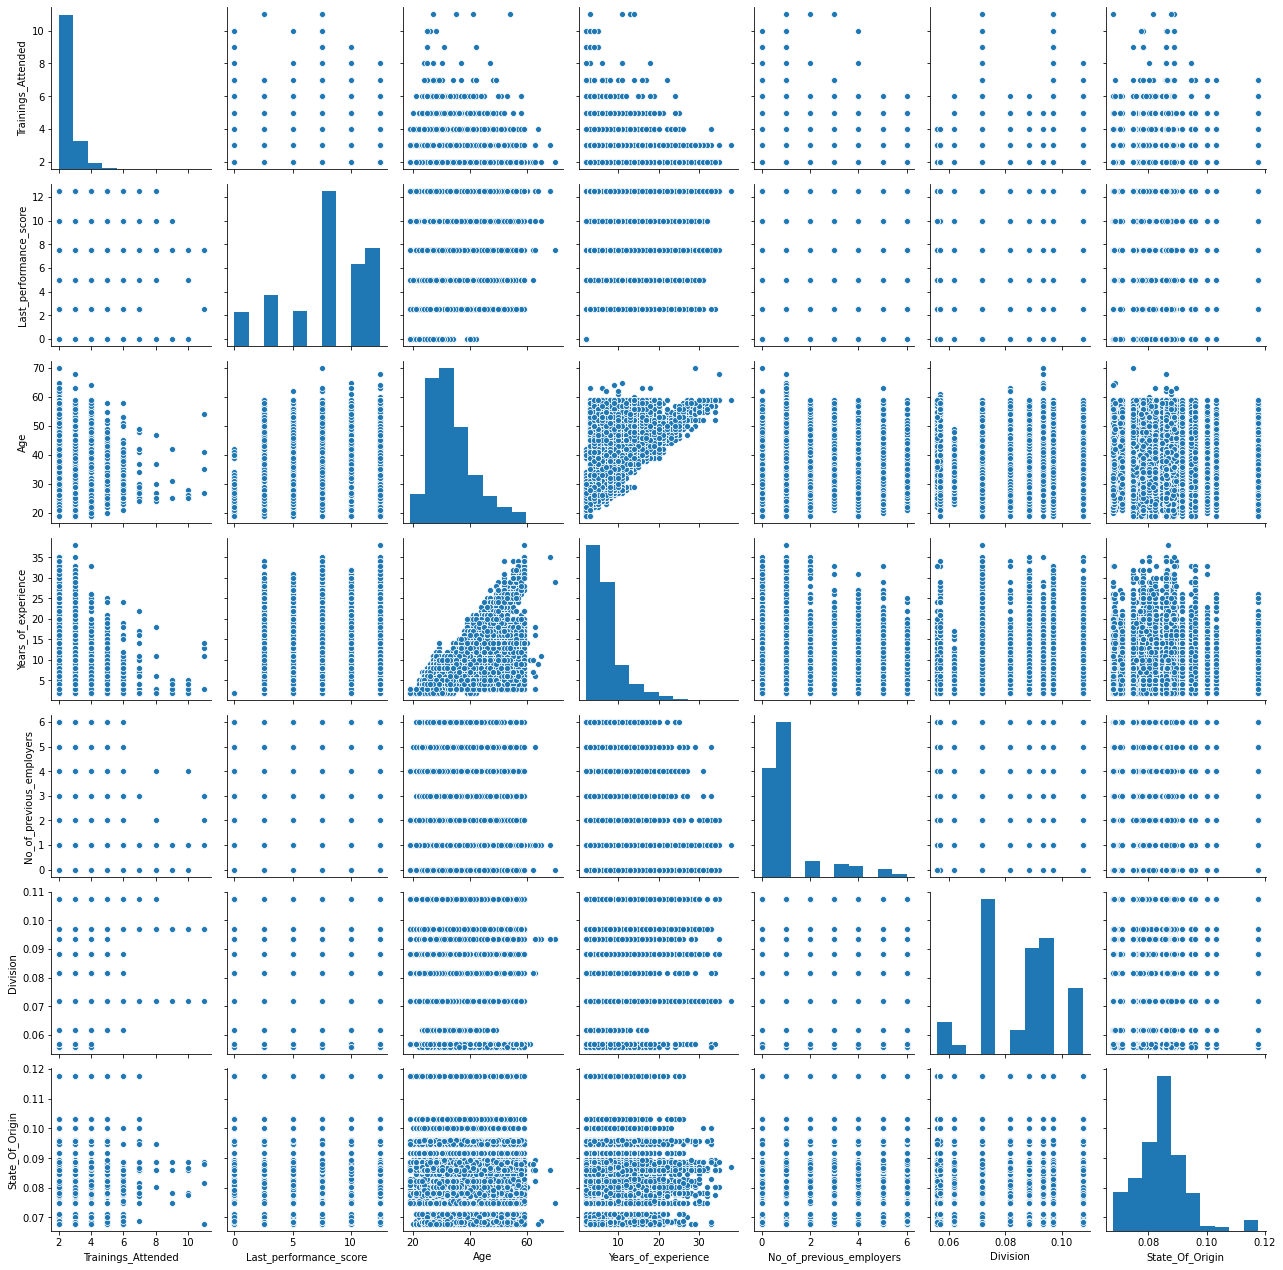

In [27]:
cont_features = [
    'Trainings_Attended',
    'Last_performance_score',
    'Age',
    'Years_of_experience',
    'No_of_previous_employers',
    'Division',
    'State_Of_Origin'
]

sb.pairplot(test[cont_features])

In [28]:
# Final preprocessed data with log-transform
log_transform_features = [
    'Trainings_Attended',
    'Last_performance_score',
    'Age',
    'Years_of_experience',
    'No_of_previous_employers',
    'Division',
    'State_Of_Origin'
]

# Added log-transform to previous preprocessing_pipeline
preprocessing_pipeline = Pipeline(steps=[('feature_union', feature_union),
                                         ('merge_columns', CustomFeatureUnionToDataFrame([num_pipeline,
                                                                                          cat_pipeline,
                                                                                          bin_pipeline,
                                                                                          target_enc_pipeline
                                                                                         ]
                                                                                        )),
                                         ('log_transformer', LogTransformer(log_transform_features))
                                        ]
                                 )

In [29]:
# Final preprocessed data with log-transform

test = preprocessing_pipeline.fit_transform(df_train)
test

,Targets_met,Previous_Award,Training_score_average,Qualification,Gender_Female,Gender_Male,Channel_of_Recruitment_Agency_and_others,Channel_of_Recruitment_Direct_Internal_process,Channel_of_Recruitment_Referral_and_Special_candidates,Foreign_schooled_No,...,Past_Disciplinary_Action_Yes,Previous_IntraDepartmental_Movement_No,Previous_IntraDepartmental_Movement_Yes,Trainings_Attended_log,Last_performance_score_log,Age_log,Years_of_experience_log,No_of_previous_employers_log,Division_log,State_Of_Origin_log
0,1.0,0.0,41.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.000000,2.602690,2.772589,2.079442,0.000000,0.015850,0.027550
1,0.0,0.0,52.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.000000,2.602690,2.397895,1.386294,0.000000,0.031851,0.027550
2,0.0,0.0,42.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.000000,2.140066,2.708050,1.945910,0.000000,0.015850,0.010025
3,0.0,0.0,42.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.693147,1.252763,2.995732,2.302585,0.693147,0.015850,0.003200
4,0.0,0.0,77.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.693147,2.140066,2.484907,1.945910,0.693147,0.036899,0.016583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38307,0.0,0.0,70.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.000000,0.000000,2.484907,0.000000,0.000000,0.050215,0.017938
38308,0.0,0.0,48.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.000000,1.791759,2.890372,1.791759,0.693147,0.031851,0.020566
38309,1.0,0.0,71.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.000000,2.602690,2.079442,1.098612,1.386294,0.036899,0.027550
38310,0.0,0.0,37.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.000000,1.252763,2.302585,0.693147,0.693147,0.015850,0.000000


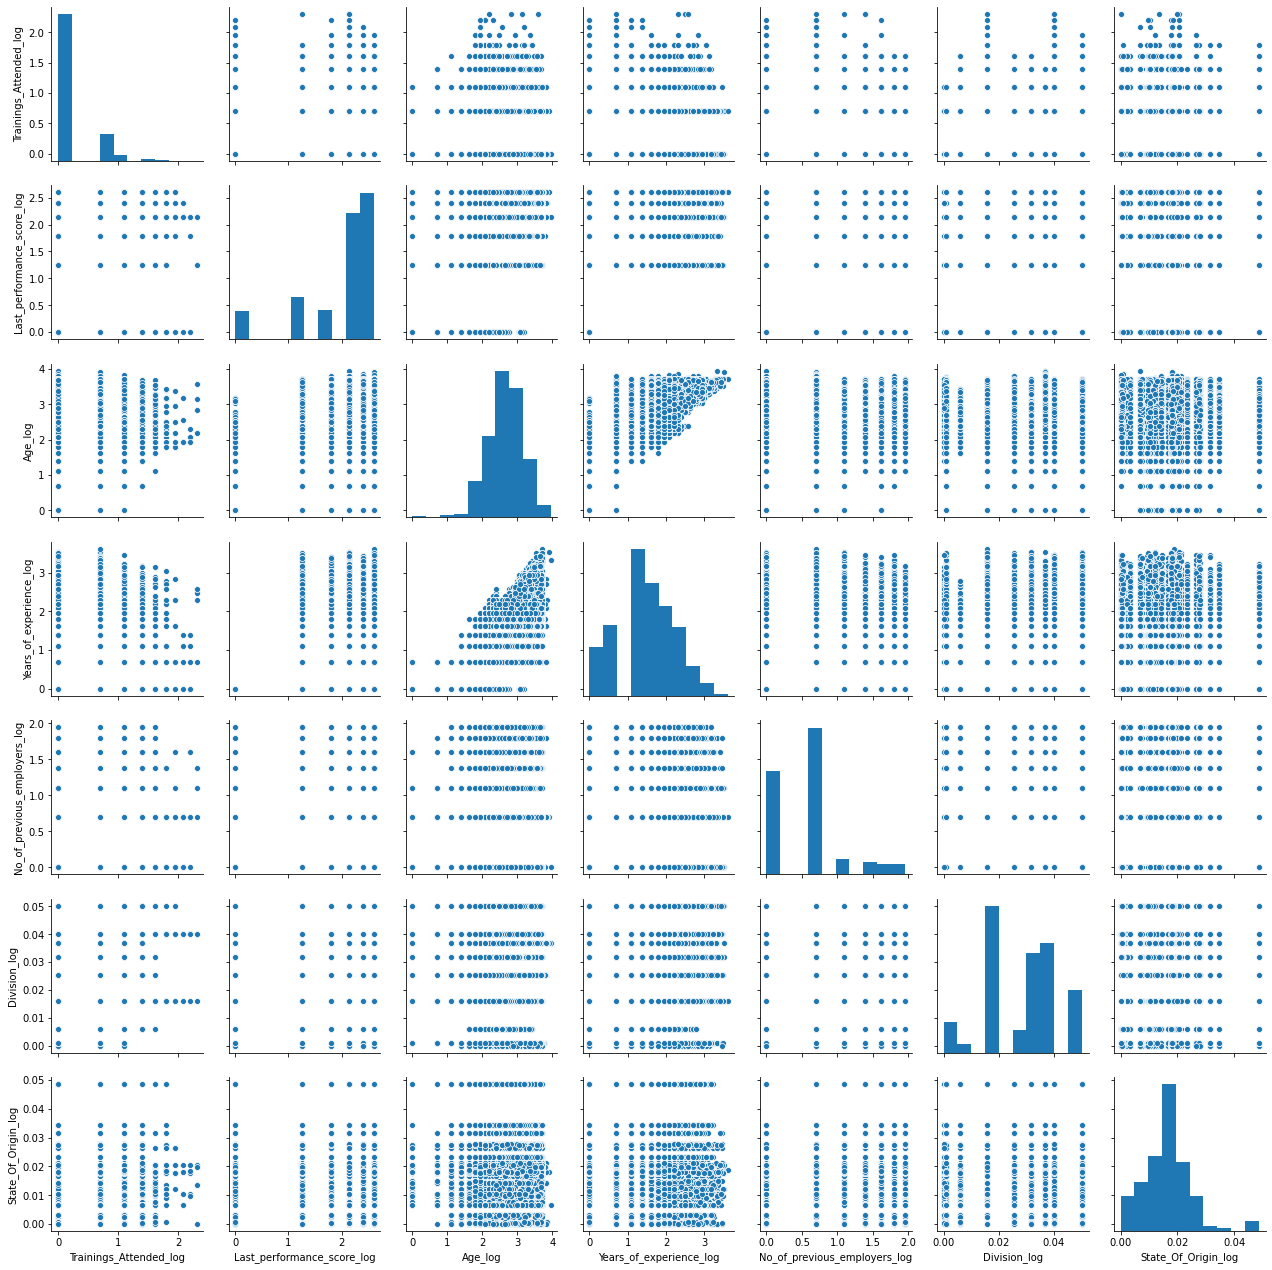

In [30]:
sb.pairplot(test[[x + '_log' for x in log_transform_features]])

In [32]:
from sklearn.model_selection import train_test_split

# Features for training
train_cols = [x for x in df_train.columns.tolist() if x != target_col]

# Train-test split and fit_transform of preprocessing pipeline
X_train, X_test, y_train, y_test = train_test_split(df_train[train_cols], 
                                                    df_train[target_col],
                                                    test_size=0.2,
                                                    random_state=42
                                                   )

X_train = preprocessing_pipeline.fit_transform(pd.concat([X_train, pd.DataFrame(y_train)], axis=1))
X_test = preprocessing_pipeline.transform(X_test)
X_test

,Targets_met,Previous_Award,Training_score_average,Qualification,Gender_Female,Gender_Male,Channel_of_Recruitment_Agency_and_others,Channel_of_Recruitment_Direct_Internal_process,Channel_of_Recruitment_Referral_and_Special_candidates,Foreign_schooled_No,...,Past_Disciplinary_Action_Yes,Previous_IntraDepartmental_Movement_No,Previous_IntraDepartmental_Movement_Yes,Trainings_Attended_log,Last_performance_score_log,Age_log,Years_of_experience_log,No_of_previous_employers_log,Division_log,State_Of_Origin_log
0,0.0,0.0,51.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.000000,2.397895,2.708050,1.609438,0.693147,0.034423,0.028615
1,0.0,0.0,52.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.000000,1.252763,2.564949,1.791759,0.000000,0.034423,0.066251
2,0.0,0.0,38.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.000000,2.397895,2.833213,0.693147,1.386294,0.017922,0.026203
3,1.0,0.0,51.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.000000,2.602690,2.079442,1.386294,0.000000,0.022568,0.019761
4,0.0,0.0,73.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.000000,1.252763,2.197225,1.386294,0.000000,0.034962,0.028615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7658,1.0,0.0,40.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.000000,2.602690,2.639057,1.945910,0.693147,0.006372,0.019761
7659,1.0,0.0,51.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.000000,2.602690,2.079442,1.609438,1.098612,0.034423,0.035215
7660,0.0,0.0,75.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.098612,2.140066,2.197225,1.098612,0.693147,0.047502,0.035244
7661,0.0,0.0,49.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.000000,2.140066,2.833213,1.609438,1.098612,0.034423,0.041745


In [33]:
# Resample of train data set - deal with imbalanced classes of target-variable
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=0.2, random_state=42)

X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

In [34]:
# Grid search using RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import math
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_jobs=-1, random_state=42)

grid_params = {
    'n_estimators': [50, 100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_features': ['log2', int(math.sqrt(X_train.shape[1]))],
    'max_depth': [10, 20, 50]
}

grid_clf = GridSearchCV(clf, grid_params, scoring='balanced_accuracy') #scoring='f1_micro'

grid_clf.fit(X_train_res, y_train_res)

print(grid_clf.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=50, max_features=5,
                       n_jobs=-1, random_state=42)


In [36]:
# Classification metrics for Train dataset

from sklearn.metrics import classification_report

y_train_pred = grid_clf.best_estimator_.predict(X_train_res)

print(classification_report(y_train_res, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28075
           1       1.00      1.00      1.00      5615

    accuracy                           1.00     33690
   macro avg       1.00      1.00      1.00     33690
weighted avg       1.00      1.00      1.00     33690



In [37]:
# Classification metrics for Test dataset

from sklearn.metrics import classification_report

y_test_pred = grid_clf.best_estimator_.predict(X_test)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6996
           1       0.77      0.24      0.37       667

    accuracy                           0.93      7663
   macro avg       0.85      0.62      0.66      7663
weighted avg       0.92      0.93      0.91      7663

